In [1]:
import pandas as pd
import numpy as np
from biopsy_grade_extractor import BiopsyGradeExtractor # load exttractor

### load the dataset which contrains biopsy reports

In [2]:
df_pathology = pd.read_csv('../data/labeled_PSA.csv')	

In [3]:
def get_report_number(report):
    return report.split('accession number: ')[1].split(' report')[0]

df_pathology['Report_Number'] = df_pathology['Report_Text'].apply(get_report_number)

In [4]:
df_pathology_test = pd.read_csv('../data/data.csv')

In [6]:
df_pathology_test = df_pathology_test[df_pathology_test.EMPI.isin(df_pathology.EMPI)]

### Instantiate BiopsyGradeExtractor and fit the data

In [7]:
# extractor = BiopsyGradeExtractor()
# df_result_test = extractor.fit(df_pathology_test, display_summary = True, return_summary_df = True)

In [8]:
df_pathology_test.shape

(4113, 28)

In [9]:
extractor = BiopsyGradeExtractor()
df_result= extractor.fit(df_pathology_test, display_summary = True, return_summary_df = True)

extracing info...: 100%|██████████| 4113/4113 [00:01<00:00, 3817.87it/s]



Extraction complete.


Displaying summary...
Counts per each primary grade: 
3.0    7957
4.0    2406
5.0     113
2.0      20
3.5      18
2.5       1
dtype: int64


Counts per each secondary grade: 
3.0    6348
4.0    3586
5.0     521
2.0      41
3.5      18
2.5       1
dtype: int64


Number of reports per each overall grade : 
1.0    1563
2.0    1286
3.0     694
4.0     330
5.0     240
dtype: int64
total =  4113
Number of unique biopsy reports :  4113
Number of unique patients :  4113
Number of unique patients with overall_grade_merged :  4113



/Users/guangyawan/.local/share/virtualenvs/CS109B-EpXkDfoL/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [10]:
df_result.shape

(4113, 28)

In [11]:
df_result['Report_Text'][df_result['overall_grade_merged'].isna()].sample(100).to_excel('../data/missing_report.xlsx')

ValueError: a must be greater than 0 unless no samples are taken

In [17]:
df_result

,EMPI,EPIC_PMRN,MRN_Type,MRN,Report_Number,Report_Date_Time,Report_Description,Report_Status,Report_Type,Report_Text,...,num_pos_cores_sum,num_total_core_sum,max_core_involve,small_cell_carc,neuroendocrine_carc,adenocarcinoma,auxiiliary_mci_score,rp_indicator,rp_date,rp_date_minus_report_date_in_days
0,100006532,1.004006e+10,BWH,975151,S9902128C,1/26/1999 12:00:00 AM,Surgical Pathology,Final,PAT,Accession Number: S9902128C Report Status: Fin...,...,1,3,[[20]],0,0,1,0.40,1,1999-02-27 00:00:00,32.0
1,100006636,1.004006e+10,BWH,984781,S0444089R,12/1/2004 12:00:00 AM,Surgical Pathology,Final,PAT,Accession Number: S0444089R Report Status: Fin...,...,1,3,[[5]],0,0,1,0.05,1,2005-02-10 00:00:00,71.0
2,100086908,1.003182e+10,BWH,4041760,BS08F03886,1/25/2008 12:00:00 AM,Surgical Pathology,Final,PAT,Accession Number: BS08F03886 Report Status: Fi...,...,1,5,[[10]],0,0,1,0.10,1,2008-04-14 00:00:00,80.0
4,100110356,1.004505e+10,BWH,4634622,BS11K31832,7/13/2011 12:00:00 AM,Surgical Pathology,Final,PAT,Accession Number: BS11K31832 Report Status: Fi...,...,4,6,"[[20, 15, 10, 5]]",0,0,1,1.00,1,2011-08-04 00:00:00,22.0
6,100067564,1.004259e+10,BWH,3686102,S0410361B,3/24/2004 12:00:00 AM,Surgical Pathology,Final,PAT,Accession Number: S0410361B Report Status: Fin...,...,3,3,"[[60, 60, 50]]",0,0,1,3.40,1,2004-05-24 00:00:00,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16808,106503199,1.002961e+10,MGH,2142809,S17-16332,3/10/2017 12:00:00 AM,Surgical Pathology,Final,PAT,Accession Number: S17-16332 Report Status: Fin...,...,13,13,"[[10], [90], [85], [90], [70], [50]]",0,0,1,44.00,0,NaN,NaN
16938,100998631,1.003356e+10,MGH,1563286,S19-56746,8/14/2019 12:00:00 AM,Surgical Pathology,Final,PAT,Accession Number: S19-56746 Report Status: Fin...,...,1,4,[[20]],0,0,1,0.60,0,NaN,NaN
16986,101689783,1.002667e+10,MGH,3717115,S17-7873,2/3/2017 12:00:00 AM,Surgical Pathology,Final,PAT,Accession Number: S17-7873 Report Status: Fina...,...,6,7,"[[90, 40], [80, 60], [90, 50]]",0,0,1,12.30,0,NaN,NaN
17891,112488945,1.012004e+10,MGH,4355980,S18-21487,4/3/2018 6:50:00 AM,Surgical Pathology,Final,PAT,Accession Number: S18-21487 Report Status: Fin...,...,4,5,"[[15], [20]]",0,0,1,2.80,0,NaN,NaN


In [11]:
df_result.overall_grade_merged.iloc[0]

1

In [12]:
df_pathology.iloc[1]['Report_Text']

'accession number: bs05n11932 report status: final type: surgical pathology specimen type: lymph node biopsy (non-heme) procedure date: 03/25/2005 ordering provider: michael w mcdonald m.d. case: bs-05-n11932 patient: john fitzgerald resident: samuel g katz, m.d., ph.d. pathologist: lucian chirieac, m.d. pathologic diagnosis: right pelvic lymph nodes: one (1) lymph node with no tumor present. left pelvic lymph nodes: one (1) lymph node with no tumor present. prostate, radical prostatectomy: prostatic adenocarcinoma (0.4 cm in greatest dimension), gleason score 3+3=6, present in the right side (see note). no lymphovascular invasion is identified. no tumor present in extraprostatic soft tissue. no tumor present in the seminal vesicles. no tumor present at the soft tissue resection margin. ajcc stage (6th edition): t2c n0 mx (see note) note: although the focus of adenocarcinoma is present on the right side, the operative note mentions that the location of the cancer in the biopsy performe

### Validate the performance of the algorithm

In [13]:
# if report_number_oi is not specified, then it randomly picks report to evaluate
for i in range(2):
    extractor.validate_results()



Extracted info : 
Report_Number                                                  ms09g80390
Report_Text             accession number: ms09g80390 report status: fi...
primary_grade                                                      [4, 4]
secondary_grade                                                    [5, 5]
overall_grade_merged                                                    5
Name: 6613, dtype: object


Pathology report : 
accession number: ms09g80390 report status: final type: surgical pathology pathology report: ms-09-g80390 case: ms-09-g80390 patient: curtis vouwie date taken: 12/14/2009 source care unit: mgh inpatient path subspecialty service: genito-urinary results to: douglas middleton dahl, m.d. resident: katy linskey, m.d. signed out by: chin-lee wu, m.d. clinical data: prostate cancer of right and left apex, middle, and base, up to gleason's 8 score. final diagnosis: prostate, radical prostatectomy: prostatic adenocarcinoma, gleason score 4+5=9/10, involving the ri

In [ ]:
# Primary Grade/Secondary Grade/overall grade merged

In [14]:
df_result.columns

Index(['Unnamed: 0', 'EMPI', 'MRN', 'hospital_rp', 'date_rp_dt',
       'date_path_dt', 'path_postRP_days', 'PLND', 'LNM', 'time_lab_result',
       'PSA', 'PSAdate_minus_RPdate', 'Report_Text', 'Report_Text_noAN',
       'Report_Number', 'primary_grade', 'secondary_grade',
       'overall_grade_merged'],
      dtype='object')

In [8]:
df_result = df_result.drop(columns = df_result.columns[[0,2,3,4,5,6,9,11,12,13,14]])

In [9]:
df_MRI = pd.read_csv('../data/MRI.csv')

In [10]:
df_MRI = df_MRI.drop(columns= ['Report_Number','Report_Text'],axis = 1)

In [11]:
df_result = df_result.merge(df_MRI,on='EMPI',how='left')

In [12]:
df_result = df_result.drop(columns = ['primary_grade','secondary_grade','PLND'],axis = 1)

In [13]:
print(df_result.shape)
for col in df_result.columns[1:]:
    if(col == 'binned'):
        continue
    print(f'Number of Missing data for column {col} : ', df_result [col].isna().sum())
    if(df_result[col].value_counts().shape[0] > 10):
        bins = df_result[col].quantile([0,.25, .5,.75,1])
        df_result['binned'] = pd.cut(df_result[col], bins)
        print (df_result['binned'].value_counts())
        continue
    print(df_result[col].value_counts())

(10766, 6)
Number of Missing data for column LNM :  0
0    10497
1      269
Name: LNM, dtype: int64
Number of Missing data for column PSA :  5429
(4.34, 6.07]     1339
(9.29, 177.5]    1334
(6.07, 9.29]     1329
(0.009, 4.34]    1309
Name: binned, dtype: int64
Number of Missing data for column overall_grade_merged :  877
2    4127
1    2743
3    1693
5     780
4     546
Name: overall_grade_merged, dtype: int64
Number of Missing data for column lymphadenopathy :  7335
False    2084
True     1347
Name: lymphadenopathy, dtype: int64
Number of Missing data for column pirads :  10063
5.0    336
4.0    312
3.0     51
2.0      3
1.0      1
Name: pirads, dtype: int64


In [14]:
df_all = df_result.dropna()

In [15]:
df_all.shape

(584, 7)

In [16]:
import xgboost as xgb

In [17]:
X = df_all[df_all.columns[2:-1]]
y = df_all['LNM']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=10)

In [18]:
from sklearn.linear_model import LogisticRegression

ovr = LogisticRegression()
ovr.fit(X_train, y_train)
ovr_preds = ovr.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
print(accuracy_score(y_test, ovr_preds))
print(classification_report(y_test, ovr_preds))

0.9572649572649573
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       111
           1       0.67      0.33      0.44         6

    accuracy                           0.96       117
   macro avg       0.82      0.66      0.71       117
weighted avg       0.95      0.96      0.95       117



In [20]:
ovr_pred_prob = ovr.predict_proba(X_test)
roc_auc_score(y_test, ovr_pred_prob[:,1] , average="weighted")

0.9789789789789789

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=5, class_weight = {0:1,1:50})
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 50}, max_depth=2, random_state=5)

In [27]:
rf_preds = clf.predict(X_test)
rf_pred_prob = clf.predict_proba(X_test)

In [28]:
print(accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

0.7350427350427351
              precision    recall  f1-score   support

           0       1.00      0.72      0.84       111
           1       0.16      1.00      0.28         6

    accuracy                           0.74       117
   macro avg       0.58      0.86      0.56       117
weighted avg       0.96      0.74      0.81       117



In [29]:
rf_pred_prob = clf.predict_proba(X_test)
roc_auc_score(y_test, rf_pred_prob[:,1] , average="weighted")

0.9834834834834835

In [42]:
df_all

,EMPI,LNM,PSA,overall_grade_merged,lymphadenopathy,pirads,binned
169,100081580,0,8.94,2,0,4.0,"(6.07, 9.29]"
696,100229964,0,7.46,2,0,4.0,"(6.07, 9.29]"
734,100244916,0,4.87,2,0,5.0,"(4.34, 6.07]"
783,100264220,0,3.05,2,0,3.0,"(0.009, 4.34]"
940,100581524,0,6.16,5,0,4.0,"(6.07, 9.29]"
...,...,...,...,...,...,...,...
10755,112448770,0,8.19,3,0,4.0,"(6.07, 9.29]"
10756,112868514,0,7.60,3,0,3.0,"(6.07, 9.29]"
10757,112868514,0,7.60,3,0,3.0,"(6.07, 9.29]"
10758,113061322,1,6.60,5,0,5.0,"(6.07, 9.29]"


In [121]:
from xgboost import XGBClassifier

df_all["lymphadenopathy"] = df_all["lymphadenopathy"].astype(int)
df_all["overall_grade_merged"] = df_all["overall_grade_merged"].astype(int)
X = df_all[df_all.columns[2:-1]]
y = df_all['LNM']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=10)

xgb_model = XGBClassifier(max_delta_step = 1)

/var/folders/bm/2x1k2y0s2bv2xxbw4jxfs_hh0000gn/T/ipykernel_21232/2825649401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["lymphadenopathy"] = df_all["lymphadenopathy"].astype(int)
/var/folders/bm/2x1k2y0s2bv2xxbw4jxfs_hh0000gn/T/ipykernel_21232/2825649401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["overall_grade_merged"] = df_all["overall_grade_merged"].astype(int)


In [122]:
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [123]:
print(accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

0.9658119658119658
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       111
           1       0.75      0.50      0.60         6

    accuracy                           0.97       117
   macro avg       0.86      0.75      0.79       117
weighted avg       0.96      0.97      0.96       117



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

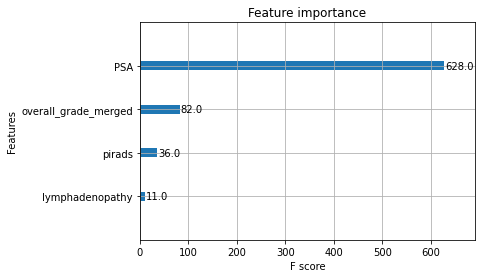

In [124]:
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(xgb_model)

In [125]:
xgb_pred_prob = xgb_model.predict_proba(X_test)
roc_auc_score(y_test, xgb_pred_prob[:,1] , average="weighted")

0.9564564564564564

In [106]:
from sklearn import metrics


df_result["lymphadenopathy"] = df_result["lymphadenopathy"].astype(float)
df_result["overall_grade_merged"] = df_result["overall_grade_merged"].astype(float)
X = df_result[df_all.columns[2:-1]]
y = df_result['LNM']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.2, random_state=10)

xgb_model = XGBClassifier(max_delta_step = 10,scale_pos_weight = 10)

In [107]:
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [108]:
X_train.shape

(8612, 4)

In [109]:
print(accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

0.9331476323119777
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2100
           1       0.12      0.26      0.16        54

    accuracy                           0.93      2154
   macro avg       0.55      0.60      0.56      2154
weighted avg       0.96      0.93      0.95      2154



In [110]:
xgb_pred_prob = xgb_model.predict_proba(X_test)
roc_auc_score(y_test, xgb_pred_prob[:,1] , average="weighted")

0.7909567901234569

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

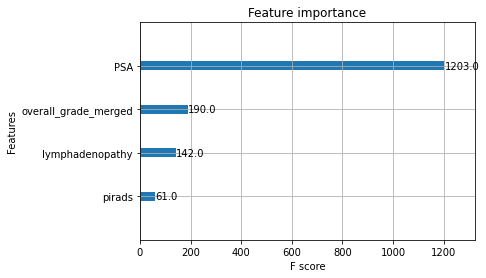

In [95]:
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(xgb_model)